In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df1 = pd.read_csv("UpdatedResumeDataSet.csv")

In [7]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [8]:
df.shape

(962, 2)

In [9]:
df.dtypes

Category    object
Resume      object
dtype: object

In [10]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [11]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

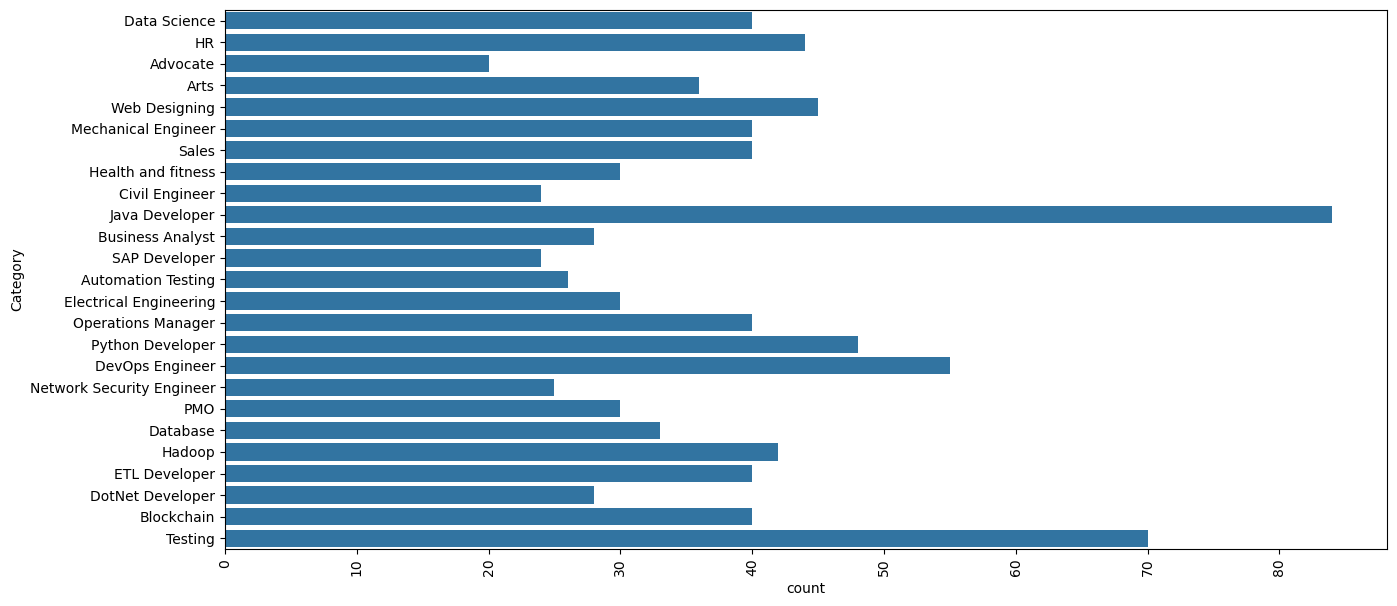

In [12]:
plt.figure(figsize=(15,7))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [13]:
df['Resume']

0      Skills * Programming Languages: Python (pandas...
1      Education Details \r\nMay 2013 to May 2017 B.E...
2      Areas of Interest Deep Learning, Control Syste...
3      Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4      Education Details \r\n MCA   YMCAUST,  Faridab...
                             ...                        
957    Computer Skills: â¢ Proficient in MS office (...
958    â Willingness to accept the challenges. â ...
959    PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961    Skill Set OS Windows XP/7/8/8.1/10 Database MY...
Name: Resume, Length: 962, dtype: object

In [14]:
import re

In [15]:
def cleaning(text):
    cleantxt = re.sub('http\S+\s',' ',text)
    cleantxt = re.sub('@\S+\s',' ',cleantxt)
    cleantxt = re.sub('#\S+\s',' ',cleantxt)
    cleantxt = re.sub('RT|cc',' ',cleantxt)
    cleantxt = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),'',cleantxt)
    cleantxt = re.sub(r'[^\x00-\x7f]',' ',cleantxt)
    cleantxt = re.sub('\s+',' ',cleantxt)
    return cleantxt

In [16]:
df['Resume']=df['Resume'].apply(lambda x: cleaning(x))

In [17]:
df['Resume'][7]

'Education Details BTech Rayat and Bahra Institute of Engineering and Biotechnology Data Science Data Science Skill Details Numpy Exprience Less than 1 year months Machine Learning Exprience Less than 1 year months Tensorflow Exprience Less than 1 year months Scikit Exprience Less than 1 year months Python Exprience Less than 1 year months GCP Exprience Less than 1 year months Pandas Exprience Less than 1 year months Neural Network Exprience Less than 1 year monthsCompany Details company Wipro description Bhawana Aggarwal EMailbhawanachd Phone 09876971076 VVersatile highenergy professional targeting challenging assignments in Machine PROFILE SUMMARY An IT professional with knowledge and experience of 2 years in Wipro Technologies in Machine Learning Deep Learning Data Science Python Software Development Skilled in managing endtoend development and software products projects from inception requirement specs planning designing implementation configuration and documentation Knowledge on P

# Applying LabelEncoder

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
df['Category'] = le.fit_transform(df['Category'])

In [20]:
df['Category']

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int32

In [21]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [22]:
df1['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

## Vectorization

In [23]:


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

req_text = tfidf.fit_transform(df['Resume'])

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(req_text,df['Category'], test_size=0.2,random_state=4)

# Model selection

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [48]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dtpred = dt.predict(x_test)
print(accuracy_score(y_test,dtpred))
X = req_text
y = df['Category']
cross_val_score(dt, X, y, cv=7)


0.9844559585492227


array([0.97101449, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [49]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rfpred = rf.predict(x_test)
print(accuracy_score(y_test,rfpred))
X = req_text
y = df['Category']
print(np.mean(cross_val_score(rf, X, y, cv=7)))

0.9948186528497409
0.9958592132505176


In [50]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
knnpred = knn.predict(x_test)
print(accuracy_score(y_test,knnpred))
X = req_text
y = df['Category']
print(np.mean(cross_val_score(knn, X, y, cv=7)))


0.9844559585492227
0.9917033141406356


In [51]:
nb = SVC()
nb.fit(x_train,y_train)
nbpred = nb.predict(x_test)
print(accuracy_score(y_test,nbpred))
X = req_text
y = df['Category']
print(np.mean(cross_val_score(nb, X, y, cv=7)))


0.9948186528497409
0.9958592132505176


## Storing the model

In [52]:
import pickle
pickle.dump(rf,open('rfc.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))


In [27]:
vari = req_text.toarray()

In [28]:
vari

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# nltk.download('stopwords')
# nltk.download('wordnet')
def cleaning(text, remove_stopwords=False, lemmatize=False):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    cleantxt = re.sub(r'http\S+', '', text)
    cleantxt = re.sub(r'@\S+', '', cleantxt)
    cleantxt = re.sub(r'#(\S+)', r'\1', cleantxt)
    cleantxt = re.sub(r'\bRT\b|\bcc\b', '', cleantxt)
    cleantxt = re.sub(r'[^A-Za-z0-9.,]', ' ', cleantxt)
    cleantxt = re.sub(r'\s+', ' ', cleantxt)
    cleantxt = cleantxt.strip()
    cleantxt = cleantxt.lower()

    words = cleantxt.split()

    if remove_stopwords:
        words = [word for word in words if word not in stop_words]

    if lemmatize:
        words = [lemmatizer.lemmatize(word) for word in words]

    cleantxt = ' '.join(words)
    
    return cleantxt

In [32]:
!pip install PyPDF


  Obtaining dependency information for PyPDF from https://files.pythonhosted.org/packages/c9/d1/450b19bbdbb2c802f554312c62ce2a2c0d8744fe14735bc70ad2803578c7/pypdf-4.2.0-py3-none-any.whl.metadata
Using cached pypdf-4.2.0-py3-none-any.whl (290 kB)


In [35]:
from pypdf import PdfReader
pd = PdfReader(r"C:\Users\USER\Documents\AIML RESUME.pdf")


In [37]:
text = ''
for i in pd.pages:
    text += i.extract_text()

In [38]:
text

'ANKITH \n7975308246 | ankith15bhandary@gmail.com | Bengaluru, Karnataka \nGithub: https://github.com/Ankith15                                                                                linkedin: www.linkedin.com/in/ankith-bhandary-642918240  \nAbout Me:  \nPassionate in AIML  with a strong foundation in data analytics, machine learning and statistics. Experience includes working with machine learning and Deep \nlearning techniques to extract valuable insights from data. Passionate about applying Deep learning to real-time data and exploring its potential when working \nwith image dataset. I would like to contribute my skills and knowledge and continue my journey in the dynamic field of AIML. \n \nExperience: \nBosch India Limited | Bidadi Ramnagara, Karnataka \nData Analyst Intern | 12/2023 - 02/2024 \n \nWorking as a Data Analyst intern at Bosch India Limited. In this internship I have gained a good experience in machine learning project from EDA to model \nbuilding. and also use

In [40]:
textt=cleaning(text)

In [41]:
textt

'ankith 7975308246 ankith15bhandary bengaluru, karnataka github linkedin www.linkedin.com in ankith bhandary 642918240 about me passionate in aiml with a strong foundation in data analytics, machine learning and statistics. experience includes working with machine learning and deep learning techniques to extract valuable insights from data. passionate about applying deep learning to real time data and exploring its potential when working with image dataset. i would like to contribute my skills and knowledge and continue my journey in the dynamic field of aiml. experience bosch india limited bidadi ramnagara, karnataka data analyst intern 12 2023 02 2024 working as a data analyst intern at bosch india limited. in this internship i have gained a good experience in machine learning project from eda to model building. and also used power bi for creating dashboards for day today business understanding. here i have contributed to three projects. 1. model building for feed pump ml project thi

In [43]:
vec = tfidf.transform([textt])

In [46]:
vec =vec.toarray()

In [48]:
from sklearn.metrics.pairwise import cosine_similarity
cosi = cosine_similarity(vari)